# PCA

In [74]:
from numpy import loadtxt
import numpy as np
# data : 당도,밀도,색상,수분함량으로 구성
data_a = loadtxt("data_a.txt",comments="#",delimiter=",",unpack=False)
data_b = loadtxt("data_b.txt",comments="#",delimiter=",",unpack=False)

In [90]:
import numpy as np

# covariance matrix 만듦
a = np.array([])
b = np.array([])
c = np.array([])
d = np.array([])
for i in range(len(data_a)):
    a=np.append(a,[data_a[i][0]])
    b=np.append(b,[data_a[i][1]])
    c=np.append(c,[data_a[i][2]])
    d=np.append(d,[data_a[i][3]])
for i in range(len(data_b)):
    a=np.append(a,[data_b[i][0]])
    b=np.append(b,[data_b[i][1]])
    c=np.append(c,[data_b[i][2]])
    d=np.append(d,[data_b[i][3]])
A = np.array([a,b,c,d])
A_cov = np.cov(A)
A_cov = np.matrix.transpose(A_cov)
# covariance 로 eigenvalue, normalized eigenvectors 구함
w,v = np.linalg.eig(A_cov)


In [91]:
print('w = ',w) # eigenvalues
print('v = ',v)   # eigenvectors

w =  [2.37655590e+01 5.16902603e-02 1.17555731e-03 2.20730832e+00]
v =  [[-6.67158129e-04 -9.47542117e-01  3.19630235e-01 -5.78326498e-05]
 [-4.61168082e-01 -2.60731478e-01 -7.73836842e-01  3.47159384e-01]
 [ 8.86602137e-01 -1.31113718e-01 -3.86796042e-01  2.17105195e-01]
 [-3.54993785e-02  1.30354229e-01  3.86525389e-01  9.12329816e-01]]


### 부분 공간에 투영
#### eigenvalue : w[0],w[3]

In [100]:
# v[0], v[3]의 orthogonal 확인 -> okay (0에 근사)
v[0][0]*v[0][3]+v[1][0]*v[1][3]+v[2][0]*v[2][3]+v[3][0]*v[3][3]

-6.938893903907228e-17

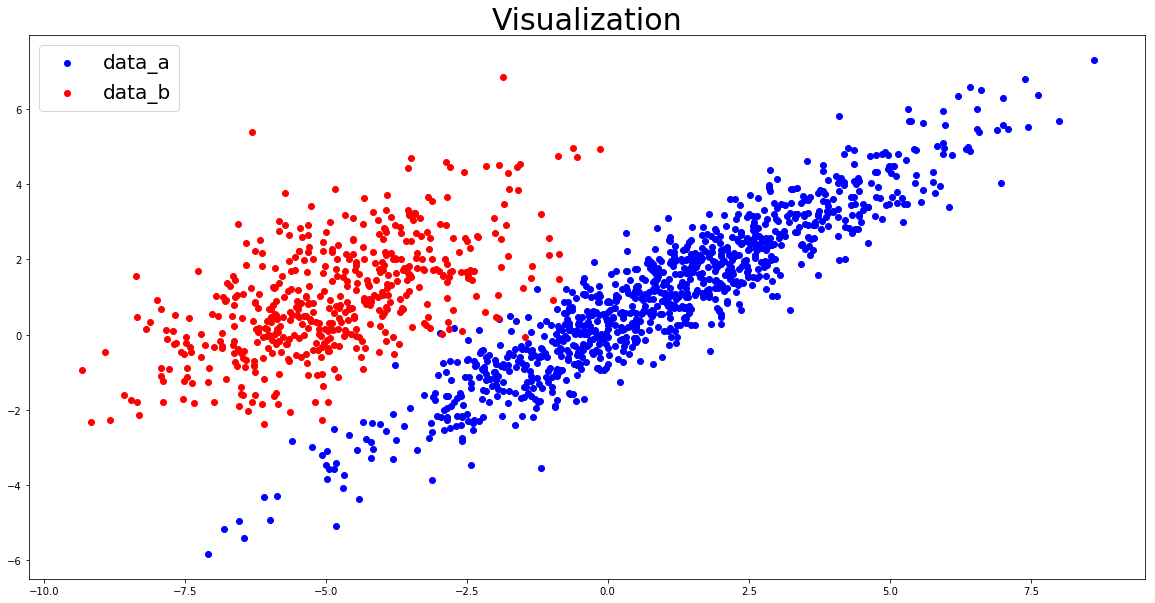

In [146]:
# S 에 투영
P_S = np.array([[v[0][0],v[0][3]],[v[3][0],v[3][3]]])# project to S
point = np.matmul(v, A)
point_2d = np.array([point[:][0],point[:][3]]) # 투영한 2d 점들

# plot 해보기
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.title('Visualization', fontsize = 30)
plt.scatter(point_2d[0][:1000],point_2d[1][:1000],marker='o',color = 'blue',label = 'data_a')
plt.scatter(point_2d[0][1000:1500],point_2d[1][1000:1500],marker='o',color = 'red',label='data_b')
plt.legend(fontsize = 20)
plt.show()

### Gaussian modeling

In [164]:
point_2d.shape

(2, 1500)

In [178]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

# point_a, point_b 에 대해 covariance matrix, mean 구함
point_a = np.array([point_2d[0][0:1000],point_2d[1][0:1000]])
point_b = np.array([point_2d[0][1000:1500],point_2d[1][1000:1500]])
a_u = np.array([np.mean(point_a[0]),np.mean(point_a[1])])
a_cov = np.cov(point_a)
b_u = np.array([np.mean(point_b[0]),np.mean(point_b[1])])
b_cov = np.cov(point_b)

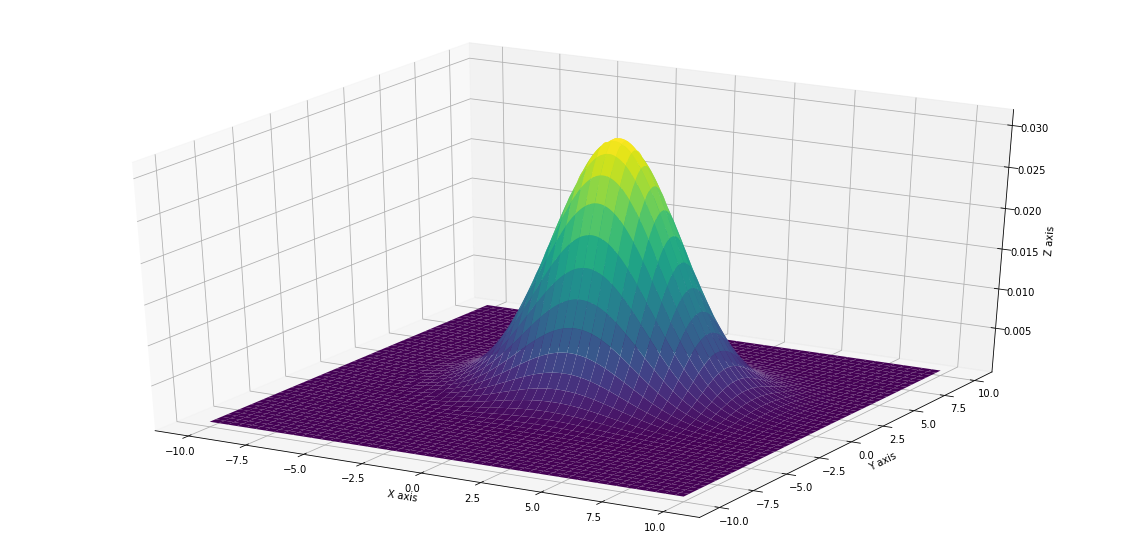

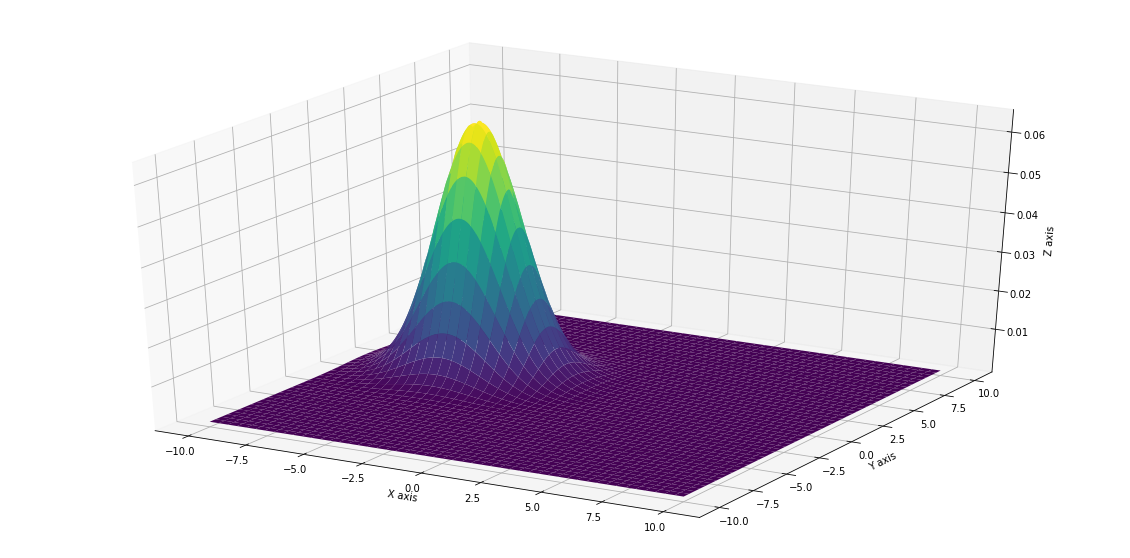

In [185]:
# 가우시안 분포
x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

# point_a 의 가우시안 분포
rv = multivariate_normal([a_u[0], a_u[1]], [[a_cov[0][0], 0], [0,a_cov[1][1]]])
fig = plt.figure(figsize= (20,10))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

# point_b 의 가우시안 분포
rv = multivariate_normal([b_u[0], b_u[1]], [[b_cov[0][0], 0], [0,b_cov[1][1]]])
fig = plt.figure(figsize= (20,10))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

### 사과 2개체의 품종 구분

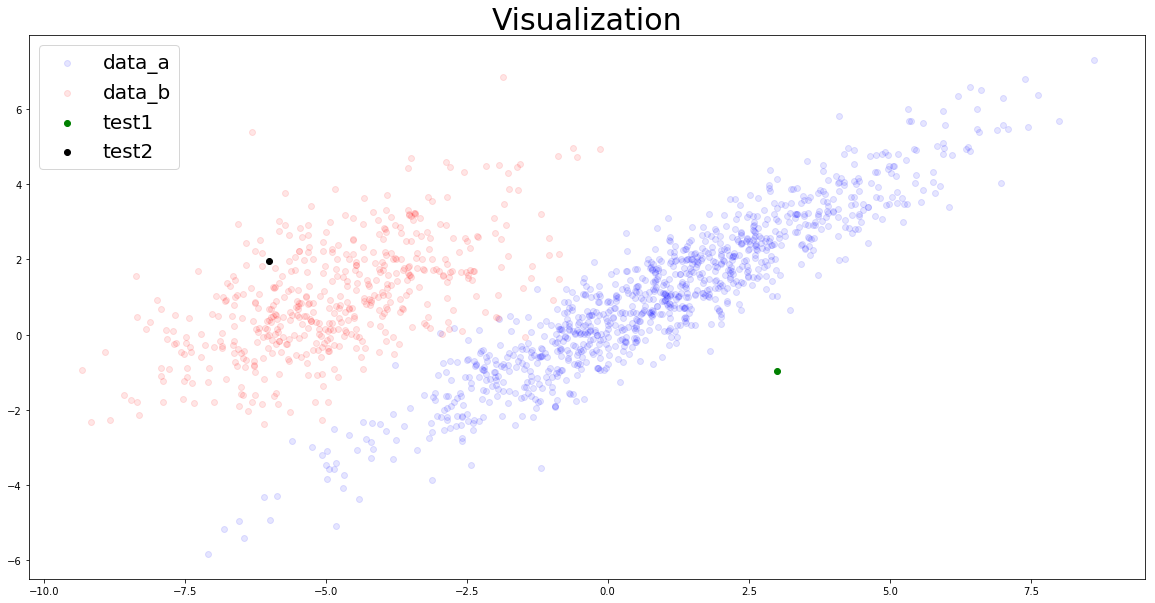

In [247]:
# Gaussian 분포, Mahalanobis 거리
data_t = loadtxt("test.txt",comments="#",delimiter=",",unpack=False) # test data
point_t = np.matmul(data_t,v)

# plot 해보기
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.title('Visualization', fontsize = 30)
plt.scatter(point_2d[0][:1000],point_2d[1][:1000],marker='o',color = 'blue',alpha=.1,label = 'data_a')
plt.scatter(point_2d[0][1000:1500],point_2d[1][1000:1500],marker='o',color = 'red',alpha=.1,label='data_b')
plt.scatter(point_t[0][0],point_t[0][3],marker='o',color='green',label='test1')
plt.scatter(point_t[1][0],point_t[1][3],marker='o',color='black',label='test2')
plt.legend(fontsize = 20)
plt.show()

### Mahalanovis Distance

In [252]:
# Mahalanovis Distance 구하기
# a 품종과 test 데이터와의 거리
data_t_1 = np.array([[point_t[0][0],point_t[0][3]]]) -a_u# a_u랑 빼주고 b_u랑 빼줘서 mahalanobis 거리 구해주면됨
T_data_t_1 = np.array([[point_t[0][0]],[point_t[0][3]]])-np.array([[a_u[0]],[a_u[1]]])
data_t_2 = np.array([[point_t[1][0],point_t[1][3]]]) -a_u# a_u랑 빼주고 b_u랑 빼줘서 mahalanobis 거리 구해주면됨
T_data_t_2 = np.array([[point_t[1][0]],[point_t[1][3]]])-np.array([[a_u[0]],[a_u[1]]])
C = np.array([[v[0][0],v[0][3]],[v[3][0],v[3][3]]])
C_inv = np.linalg.inv(C)

MD_t1_a = np.matmul(data_t_1,C_inv)
MD_t1_a = np.matmul(MD_t1_a,T_data_t_1)
MD_t2_a = np.matmul(data_t_2,C_inv)
MD_t2_a = np.matmul(MD_t2_a,T_data_t_2)

print('MD_t1_a : ',abs(MD_t1_a))
print('MD_t2_a : ',abs(MD_t2_a))

MD_t1_a :  [[6155.92062015]]
MD_t2_a :  [[71643.99280158]]


In [253]:
# Mahalanovis Distance 구하기
# a 품종과 test 데이터와의 거리
data_t_1 = np.array([[point_t[0][0],point_t[0][3]]]) -b_u# a_u랑 빼주고 b_u랑 빼줘서 mahalanobis 거리 구해주면됨
T_data_t_1 = np.array([[point_t[0][0]],[point_t[0][3]]])-np.array([[b_u[0]],[b_u[1]]])
data_t_2 = np.array([[point_t[1][0],point_t[1][3]]]) -b_u# a_u랑 빼주고 b_u랑 빼줘서 mahalanobis 거리 구해주면됨
T_data_t_2 = np.array([[point_t[1][0]],[point_t[1][3]]])-np.array([[b_u[0]],[b_u[1]]])
C = np.array([[v[0][0],v[0][3]],[v[3][0],v[3][3]]])
C_inv = np.linalg.inv(C)

MD_t1_b = np.matmul(data_t_1,C_inv)
MD_t1_b = np.matmul(MD_t1_b,T_data_t_1)
MD_t2_b = np.matmul(data_t_2,C_inv)
MD_t2_b = np.matmul(MD_t2_b,T_data_t_2)

print('MD_t1_b : ',abs(MD_t1_b))
print('MD_t2_b : ',abs(MD_t2_b))

MD_t1_b :  [[91142.73985761]]
MD_t2_b :  [[1957.42227609]]


In [94]:
w

array([2.37655590e+01, 5.16902603e-02, 1.17555731e-03, 2.20730832e+00])

## 얘들은 그냥 일단...

In [81]:

mean_a = np.mean(a)*np.ones(len(data_a)+len(data_b))
mean_b = np.mean(b)*np.ones(len(data_a)+len(data_b))
mean_c = np.mean(c)*np.ones(len(data_a)+len(data_b))
mean_d = np.mean(d)*np.ones(len(data_a)+len(data_b))
# np.cov 하면 covariance matrix 나옴
a_cov = a-mean_a
b_cov = a-mean_b
c_cov = a-mean_c
d_cov = a-mean_d
A_1 = np.array([a_cov,b_cov,c_cov,d_cov])
A_2 = A_1.transpose()
A_cov = np.matmul(A_1,A_2) # 그냥 np.multiply는 element-wise 로 곱해줌

